# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("advertising.csv")
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.shape

(200, 4)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Cleaning

In [7]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no NULL values in the dataset, hence it is clean.

<AxesSubplot:>

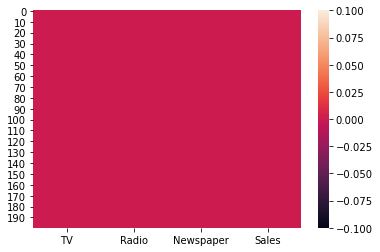

In [8]:
sns.heatmap(sales.isnull())

Summary Statistics

In [9]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


High standard deviation are present in TV, Radio, Newspaper, means data is spread too much.

Newspaper has mean greater than median, it means data has skewness. Large gap between 75 percentile and max in Newspaper, hence outliers are present.

In [10]:
sales.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

# EDA

<AxesSubplot:>

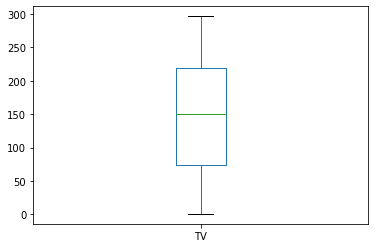

In [11]:
sales['TV'].plot.box()

<AxesSubplot:>

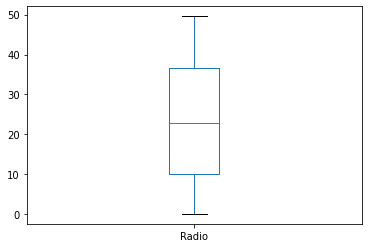

In [12]:
sales['Radio'].plot.box()

<AxesSubplot:>

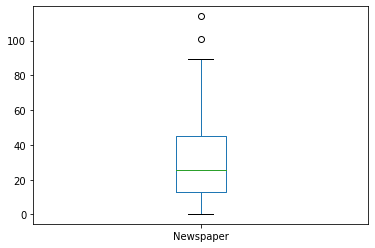

In [13]:
sales['Newspaper'].plot.box()

<AxesSubplot:>

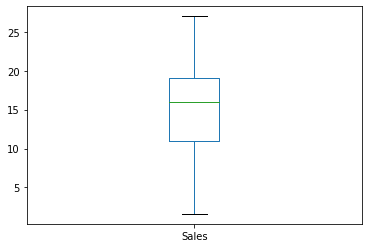

In [14]:
sales['Sales'].plot.box()

# Correlation

In [19]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

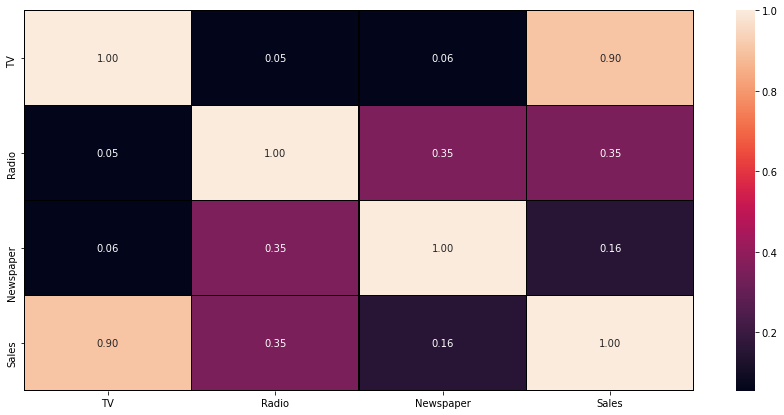

In [21]:
# Correlation using Heatmap

import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
sns.heatmap(sales.corr(), annot = True, linewidth = 0.5, linecolor= 'black', fmt= '.2f')

Outcome of Correlation:-

Max Correlation : 
            TV and Radio
    
Min Correlation:
            Newspaper

# Normal Distribution Curve

<AxesSubplot:xlabel='TV', ylabel='Density'>

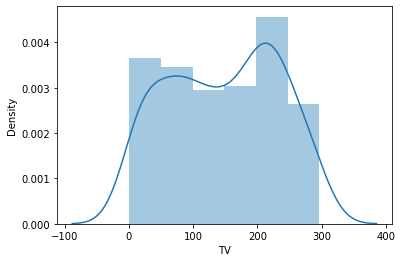

In [22]:
# for Visualize skewness
sns.distplot(sales['TV'])

<AxesSubplot:xlabel='Radio', ylabel='Density'>

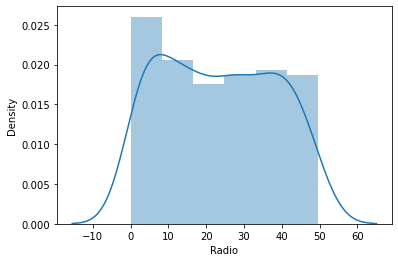

In [23]:
sns.distplot(sales['Radio'])

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

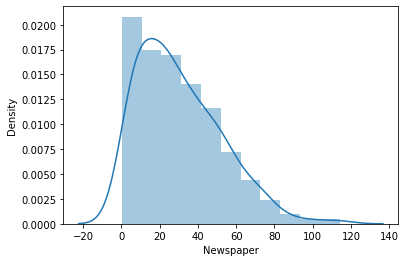

In [24]:
sns.distplot(sales['Newspaper'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

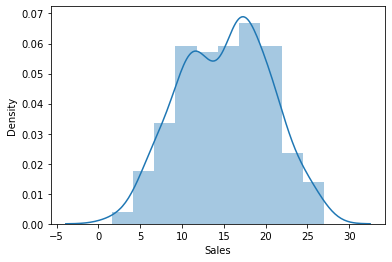

In [25]:
sns.distplot(sales['Sales'])

In [15]:
# Removing Outliers

from scipy.stats import zscore
z = np.abs(zscore(sales))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.32231867e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 8.97514665e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 5.93947713e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 2.59834337e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 5.25455420e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.50464857e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 6.31893582e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 3.66272500e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.95999899e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 8.90779273e-02],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 4.80110107e-01],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 4.30590748e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 1.12518988e+00],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [16]:
threshold = 3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [17]:
z[16][2]

3.8411707150992718

In [18]:
z[101][2]

3.238153957342154

In [26]:
sales_new = sales[(z<3).all(axis = 1)]
print(sales.shape)
print(sales_new.shape)

(200, 4)
(198, 4)


# Divide data in Features and Vector:

In [27]:
x = sales_new.drop(['Sales'], axis = 1)
y = sales_new['Sales']

# Remove Skewness

In [28]:
from sklearn.preprocessing import power_transform
x = power_transform(x , method = 'yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

# Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [35]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 155  The model performs very well
At random_state:- 155
Training r2_score is:- 91.14563449384231
Testing r2_score is:- 91.1466949173533
At random state 719  The model performs very well
At random_state:- 719
Training r2_score is:- 91.19917596333585
Testing r2_score is:- 91.20380207065172
At random state 866  The model performs very well
At random_state:- 866
Training r2_score is:- 91.2065134966197
Testing r2_score is:- 91.21060925250384
At random state 946  The model performs very well
At random_state:- 946
Training r2_score is:- 91.14313528831619
Testing r2_score is:- 91.14470804549364


In [37]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=155,test_size=0.20)

In [40]:
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
lr.score(x_train, y_train)

0.908452003582488

In [43]:
# predict the value

pred = lr.predict(x_test)
print("Predicted result price: ", pred)
print("actual price ", y_test)

Predicted result price:  [21.80163655 12.85414715 13.41586557 20.01462608 16.48645752 13.89385287
 24.35461222 20.70871565  6.91984808 15.53983377 14.75246539  7.17748008
  8.54824148  5.62824456  8.93798079 15.62123478 16.73888754 19.27960222
 22.51223913  8.42053873 16.58273308 10.80572104 20.86528992 19.12084946
 18.31862552 17.7274012  21.39059354 11.16044299  9.52200083 21.31514599
 17.33873066  3.95840835 12.54722223 21.04104162 13.23285474 15.83307472
 19.44305215 20.36908002 21.698933   11.06046504]
actual price  54     20.2
71     12.4
31     11.9
35     17.8
167    17.2
7      13.2
183    26.2
169    20.0
132     5.7
87     16.0
57     13.2
56      5.5
127    11.9
91      7.3
166     8.0
96     16.7
122    16.6
139    20.7
137    20.8
158     7.3
160    16.4
190    10.8
124    19.7
74     17.0
41     17.1
163    18.0
128    24.7
46     10.6
65     11.3
176    20.2
162    19.9
108     5.3
94     11.5
69     22.3
83     13.6
19     14.6
141    19.2
92     19.4
111    21.8
18   

In [45]:
print('error:')

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

print(r2_score(y_test, pred))

error:
Mean absolute error:  1.179521630384857
Mean squared error:  2.024383088521631
Root Mean Squared Error:  1.422808169965871
0.9284080696838317


# Regularization

# Lasso

In [50]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [52]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 90.68389309250755
R2_score is :- 90.90195599214832


At cv:- 3
Cross validation score is:- 90.54910826322204
R2_score is :- 90.90195599214832


At cv:- 4
Cross validation score is:- 90.74757370441925
R2_score is :- 90.90195599214832


At cv:- 5
Cross validation score is:- 90.62619624416625
R2_score is :- 90.90195599214832


At cv:- 6
Cross validation score is:- 90.39485101479818
R2_score is :- 90.90195599214832


At cv:- 7
Cross validation score is:- 90.25152587430652
R2_score is :- 90.90195599214832


At cv:- 8
Cross validation score is:- 90.76968007034766
R2_score is :- 90.90195599214832


At cv:- 9
Cross validation score is:- 90.21419756077711
R2_score is :- 90.90195599214832




In [53]:
print("At cv:-",8)
print("Cross validation score is:-", 90.76968007034766 )
print("R2_score is :-", 90.90195599214832)

At cv:- 8
Cross validation score is:- 90.76968007034766
R2_score is :- 90.90195599214832


In [54]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 1.3962144789629276
Mean Squared Error: 3.0120752139856926
Root Mean Square Error: 1.7355331209705254


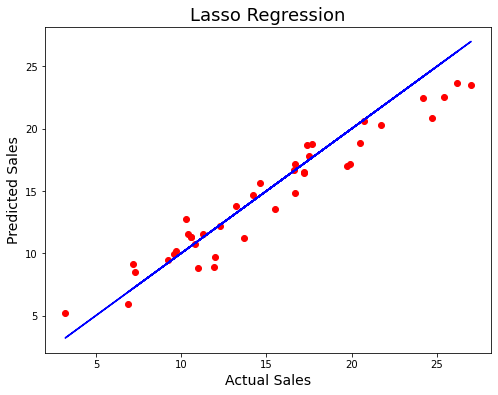

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# Model Saving:

In [56]:
import pickle
filename = 'Advertising_Sales_Prediction.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [57]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
sales_com = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
sales_com

,original,predicted
0,20.2,21.801637
1,12.4,12.854147
2,11.9,13.415866
3,17.8,20.014626
4,17.2,16.486458
5,13.2,13.893853
6,26.2,24.354612
7,20.0,20.708716
8,5.7,6.919848
9,16.0,15.539834


# From the above table the model is predicted the values with 90 percent accuracy.